In [1]:
import pandas as pd
import numpy as np
from tqdm import tqdm 

In [2]:
df_=pd.read_stata('../HRS-HCAP-Classification/HCAPHRS.dta')
df_=df_.set_index('HHID')
df_

,PN,SECU,STRATUM,PWGTR,HCAP16WGTR,PINSAMP,PIWWAVE,PIWYEAR,PMARST,PNURSHM,...,x3x4,x3x5,x3x6,x3x7,x4x5,x4x6,x4x7,x5x6,x5x7,x6x7
HHID,,,,,,,,,,,,,,,,,,,,,
010001,010,2.0,1.0,7558.0,NaN,1.0,1.0,2016.0,4.0,5.0,...,0.0,0.0,0.0,0.000000,-0.056281,-0.045795,0.0,0.0,0.0,0.0
010003,030,2.0,1.0,6900.0,NaN,1.0,1.0,2016.0,3.0,5.0,...,0.0,0.0,0.0,0.000000,-0.056281,-0.045795,4.0,0.0,0.0,0.0
010004,040,2.0,1.0,5836.0,17148.0,1.0,1.0,2016.0,3.0,5.0,...,0.0,0.0,0.0,0.000000,-0.056281,-0.045795,0.0,0.0,0.0,0.0
010013,040,2.0,1.0,5768.0,NaN,1.0,1.0,2016.0,2.0,5.0,...,0.0,0.0,0.0,0.000000,-0.056281,-0.045795,1.0,0.0,0.0,0.0
010038,010,2.0,2.0,6573.0,16431.0,1.0,1.0,2016.0,1.0,5.0,...,0.0,0.0,0.0,0.006944,-0.056281,-0.045795,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
923525,010,1.0,51.0,1214.0,NaN,1.0,1.0,2016.0,1.0,5.0,...,0.0,0.0,0.0,0.000000,0.943719,-0.045795,2.0,0.0,2.0,0.0
923525,020,1.0,51.0,1477.0,NaN,1.0,1.0,2017.0,1.0,5.0,...,0.0,0.0,0.0,0.000000,-0.056281,-0.045795,0.0,0.0,0.0,0.0
952836,010,2.0,12.0,1041.0,NaN,1.0,1.0,2016.0,2.0,5.0,...,0.0,0.0,0.0,-0.000000,-0.056281,0.954205,-6.0,0.0,-0.0,-6.0


In [3]:
df_.columns

Index(['PN', 'SECU', 'STRATUM', 'PWGTR', 'HCAP16WGTR', 'PINSAMP', 'PIWWAVE',
       'PIWYEAR', 'PMARST', 'PNURSHM', 'PPROXY', 'rage', 'PA019', 'PAGE',
       'female', 'black', 'hisp', 'SCHLYRS', 'HISPANIC', 'RACE', 'vdori',
       'vdlfl1z', 'vdlfl2', 'vdlfl3', 'vdwdimmz', 'vdwddelz', 'vdexf7z',
       'vdsevens', 'vdcount', 'nPG014', 'nPG021', 'nPG023', 'nPG030', 'nPG040',
       'nPG041', 'nPG044', 'nPG047', 'nPG050', 'nPG059', 'PD102', 'jorm',
       'vs1hcapdx', 'vs1hcapdxeap', 'nonzeroweight', 'inHCAP', 'age65up',
       'cogfunction2016', 'PrDem', 'PrCIND', 'PrNorm', 'Cog', 'CogSd',
       'Hudomiet_classification', 'SCHLYRSimp', 'DEGREE', 'spage1', 'spage2',
       'spage3', 'rage_cat', 'Sex', 'RaceAndEthnicity',
       'Educational_Attainment', 'x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7',
       'x1x4', 'x1x5', 'x1x6', 'x1x7', 'x2x4', 'x2x5', 'x2x6', 'x2x7', 'x3x4',
       'x3x5', 'x3x6', 'x3x7', 'x4x5', 'x4x6', 'x4x7', 'x5x6', 'x5x7', 'x6x7'],
      dtype='object')

In [4]:
cols_ignore=['SECU', 'PN','STRATUM','PINSAMP', 'HCAP16WGTR','PIWWAVE',
             'PIWYEAR','PPROXY','rage','PA019','PAGE','x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7',
       'x1x4', 'x1x5', 'x1x6', 'x1x7', 'x2x4', 'x2x5', 'x2x6', 'x2x7', 'x3x4',
       'x3x5', 'x3x6', 'x3x7', 'x4x5', 'x4x6', 'x4x7', 'x5x6', 'x5x7', 'x6x7','SCHLYRSimp',
          'spage1', 'spage2','spage3' ]

In [5]:
df_=df_[['rage', 'female', 'black', 'hisp', 'SCHLYRS', 'vdori', 'vdlfl1z',
       'vdlfl2', 'vdlfl3', 'vdwdimmz', 'vdwddelz', 'vdexf7z', 'vdsevens',
       'vdcount']]

In [6]:
df_.columns

Index(['rage', 'female', 'black', 'hisp', 'SCHLYRS', 'vdori', 'vdlfl1z',
       'vdlfl2', 'vdlfl3', 'vdwdimmz', 'vdwddelz', 'vdexf7z', 'vdsevens',
       'vdcount'],
      dtype='object')

In [7]:
#df_['bineduc']=df_['Educational_Attainment'].isin(['Education beyond college','Some college'])+0
#df_=df_.drop('Educational_Attainment',axis=1)

In [8]:
df=df_.copy()
N=26
# Step 1: Select columns with > N unique entries
cols_to_process = [col for col in df.columns if df[col].nunique() > N]

# Step 2: Round/cluster each selected column to N closest values
for col in cols_to_process:
    unique_vals = np.linspace(df[col].min(), df[col].max(), N)  # N evenly spaced values
    df[col] = df[col].apply(lambda x: unique_vals[np.argmin(np.abs(unique_vals - x))])
df

,rage,female,black,hisp,SCHLYRS,vdori,vdlfl1z,vdlfl2,vdlfl3,vdwdimmz,vdwddelz,vdexf7z,vdsevens,vdcount
HHID,,,,,,,,,,,,,,
010001,75.08,0.0,0.0,0.0,12.0,4.0,0.080043,2.0,2.0,0.500000,0.500000,0.320041,4.0,1.0
010003,59.12,1.0,0.0,0.0,16.0,NaN,0.000051,NaN,NaN,0.500000,0.300051,0.440014,5.0,1.0
010004,70.52,1.0,0.0,0.0,12.0,4.0,0.280022,2.0,2.0,0.699957,0.699949,0.999887,4.0,1.0
010013,68.24,1.0,0.0,0.0,13.0,4.0,0.160034,2.0,2.0,0.500000,0.500000,0.679959,5.0,1.0
010038,79.64,0.0,0.0,0.0,16.0,3.0,0.160034,2.0,2.0,0.699957,0.599975,0.999887,5.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
923525,59.12,1.0,1.0,0.0,14.0,NaN,0.000051,NaN,NaN,0.599979,0.400025,0.000113,0.0,1.0
923525,61.40,0.0,1.0,0.0,12.0,NaN,0.000051,NaN,NaN,0.500000,0.200076,0.000113,1.0,1.0
952836,56.84,1.0,0.0,1.0,6.0,NaN,0.000051,NaN,NaN,0.599979,0.500000,0.599977,5.0,1.0


In [13]:
df=df.astype(str).replace('nan','')

In [14]:
S=10000
df_training=df.sample(S)
training_index=df_training.index.values
df_test = df.drop(df_training.index)

In [15]:
X=df_training.values.astype(str)
feature_names=df_training.columns

In [16]:
from quasinet.qnet import load_qnet
from quasinet.qnet import save_qnet
from quasinet.qsampling import qsample
from quasinet.qnet import qdistance, qdistance_matrix
from quasinet.qnet import Qnet

In [17]:
%%time
model=Qnet(feature_names=feature_names,alpha=.15)
model.fit(X)
save_qnet(model,'modelrestricted',gz=True)

CPU times: user 15.6 s, sys: 173 ms, total: 15.8 s
Wall time: 15.9 s


In [14]:
model.training_index=training_index
#save_qnet(model,'modelbin',gz=True)

In [18]:
OUTDIR='treesrestricted/'
modelpath='modelrestricted.gz'
model=load_qnet(modelpath,gz=True)
model.viz_trees(tree_path=OUTDIR,big_enough_threshold=1,format='png')

In [19]:
NULL=np.array(['']*len(feature_names)).astype('U100')

In [20]:
X_test=df_test.values.astype(str)

In [21]:
def getbp(s):
    # generate a vector summing to 1.0 with zeros where 
    # the response/observation is missing
    # so that we can perturb only in entries which are non-missing
    bp=np.ones(len(s))
    bp[np.where(s=='')[0]]=0
    return bp/bp.sum()

In [22]:
N=1000
steps=100

In [23]:
# bad synthetic generation
gensamples_bad=[qsample(s,model,steps=steps,alpha=-1,baseline_prob=getbp(s)) for s in tqdm(X_test[:N])]
ngennoswapq_bad=np.array([qdistance(NULL,s,model,model) for s in tqdm(gensamples_bad)])
gen_noswap_bad_df=pd.DataFrame(gensamples_bad,columns=feature_names)

100%|██████████████████████████████████████| 1000/1000 [00:08<00:00, 118.49it/s]


In [24]:
# LSM synthetic generation
gensamples=[qsample(s,model,steps=steps,alpha=.97,baseline_prob=getbp(s)) for s in tqdm(X[:N])]
ngennoswapq=np.array([qdistance(NULL,s,model,model) for s in tqdm(gensamples)])
gen_noswap_df=pd.DataFrame(gensamples,columns=feature_names)


100%|██████████████████████████████████████| 1000/1000 [00:08<00:00, 113.57it/s]


In [25]:
# original
ngennoswap=np.array([qdistance(NULL,s,model,model) for s in tqdm(X_test[:N])])
gen_test_df = pd.DataFrame(X_test[:N],columns=feature_names)

100%|██████████████████████████████████████| 1000/1000 [00:08<00:00, 115.40it/s]


In [27]:
# reading synthpop data
import pandas as pd
import pyreadr

# .rds typically stores a single object; grab the first/only value
res = pyreadr.read_r("../../data/synthetic_datasets/synthetic_dataset_40.rds")
obj = next(iter(res.values()))

# If it's a data.frame/tibble, this is a pandas DataFrame already
if isinstance(obj, pd.DataFrame):
    df = obj
else:
    # .rds can hold other objects (vector, list); convert as needed
    # Example: turn an R vector into a DataFrame
    df = pd.DataFrame(obj)

dsynthpop=df.copy()

In [29]:
tmp=dsynthpop.drop('rage',axis=1)
Xsyn=pd.concat([pd.DataFrame(columns=feature_names),tmp]).astype(str).replace('nan','').drop('group',axis=1).values.astype(str)

In [30]:
ngensynth=np.array([qdistance(NULL,s,model,model) for s in tqdm(Xsyn[:N])])

100%|██████████████████████████████████████| 1000/1000 [00:08<00:00, 118.27it/s]


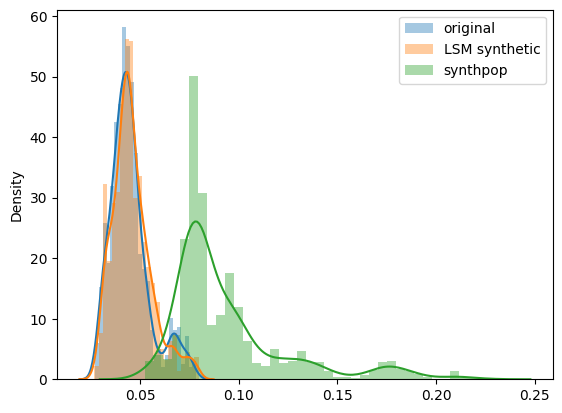

In [32]:
import seaborn as sns
import pylab as plt
sns.distplot(ngennoswap,label='original')
sns.distplot(ngennoswapq,label='LSM synthetic')
#sns.distplot(ngennoswapq_bad,label='bad synthetic')
sns.distplot(ngensynth,label='synthpop')
plt.legend()

In [33]:
from scipy.stats import ks_2samp

alpha=1e-5
# KS two-sample test
stat, p_val = ks_2samp(ngennoswap,ngennoswapq)
print('comparing original and synthetic data')
print(f"KS Statistic: {stat:.4f}, p-value: {p_val:.4g}")

if p_val < alpha:
    print("Reject null hypothesis: distributions differ.")
else:
    print("Fail to reject null hypothesis: distributions are similar.")

comparing original and synthetic data
KS Statistic: 0.0780, p-value: 0.004544
Fail to reject null hypothesis: distributions are similar.


In [62]:
stat, p_val = ks_2samp(ngennoswapq_bad,ngennoswapq)
print('comparing bad-synthetic and synthetic data')
print(f"KS Statistic: {stat:.4f}, p-value: {p_val:.4g}")

if p_val < alpha:
    print("Reject null hypothesis: distributions differ.")
else:
    print("Fail to reject null hypothesis: distributions are similar.")

comparing bad-synthetic and synthetic data
KS Statistic: 0.7070, p-value: 1.724e-240
Reject null hypothesis: distributions differ.


In [35]:
# synthetic dataframe
Ds_=gen_noswap_df
# original dataframe 
D_=df_training.sample(1000)

In [36]:
# Function to try numeric conversion only if column looks numeric
def safe_to_float(series):
    try:
        # Try converting; if all values become NaN, keep original
        converted = pd.to_numeric(series.replace('', np.nan), errors='coerce')
        if converted.notna().sum() > 0:
            return converted
        else:
            return series
    except:
        return series

# Apply column-wise
D=D_.apply(safe_to_float)
Ds=Ds_.apply(safe_to_float)


In [37]:
Dm=D.mean(numeric_only=True)
Dv=D.std(numeric_only=True)


In [38]:
Dsm=Ds.mean(numeric_only=True)
Dsv=Ds.std(numeric_only=True)
 

mean
std


<Axes: >

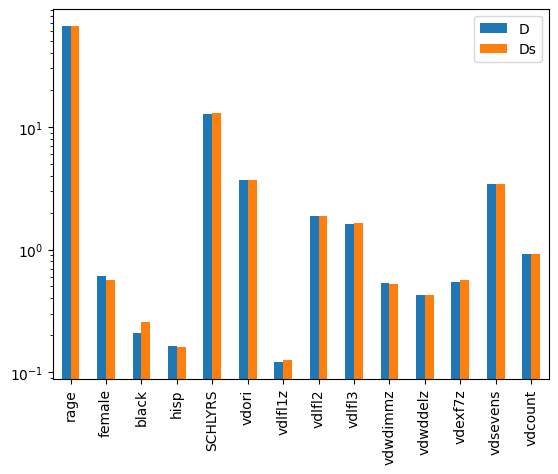

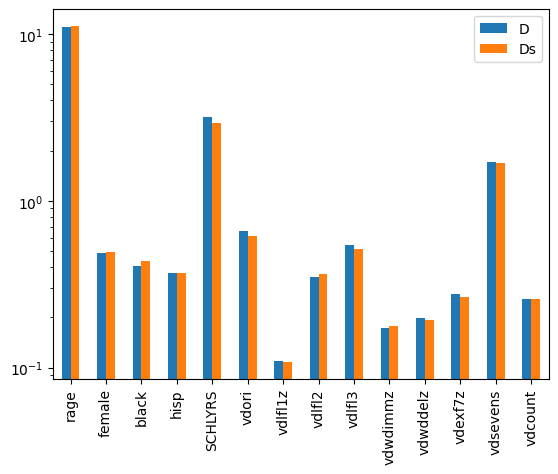

In [39]:
print('mean')
pd.DataFrame({'D':Dm,'Ds':Dsm}).plot(kind='bar',logy=True)
print('std')
pd.DataFrame({'D':Dv,'Ds':Dsv}).plot(kind='bar',logy=True)


In [40]:
dsynthpop.columns

Index(['rage', 'female', 'black', 'hisp', 'SCHLYRS', 'vdori', 'vdlfl1z',
       'vdlfl2', 'vdlfl3', 'vdwdimmz', 'vdwddelz', 'vdexf7z', 'vdsevens',
       'vdcount', 'group'],
      dtype='object')

In [41]:
feature_names

Index(['rage', 'female', 'black', 'hisp', 'SCHLYRS', 'vdori', 'vdlfl1z',
       'vdlfl2', 'vdlfl3', 'vdwdimmz', 'vdwddelz', 'vdexf7z', 'vdsevens',
       'vdcount'],
      dtype='object')

In [42]:
dsynthpop.vdwddelz.mean()

0.3985081652274783

In [43]:
D.vdwddelz.mean()

0.42595244520866343

In [44]:
Ds.vdwddelz.mean()

0.42249630126758414

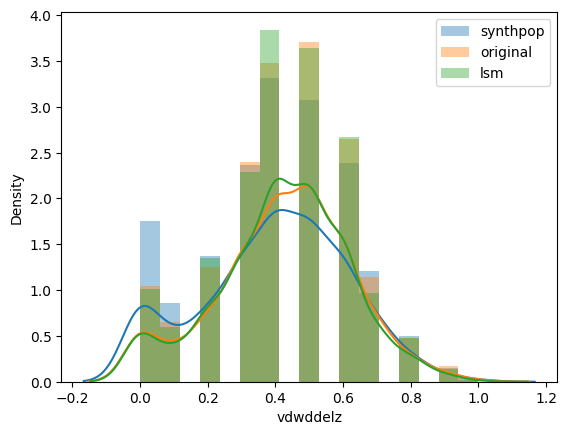

In [45]:
sns.distplot(dsynthpop.sample(1000).vdwddelz,label='synthpop')
sns.distplot(D.vdwddelz,label='original')
sns.distplot(Ds.vdwddelz,label='lsm')
plt.legend()

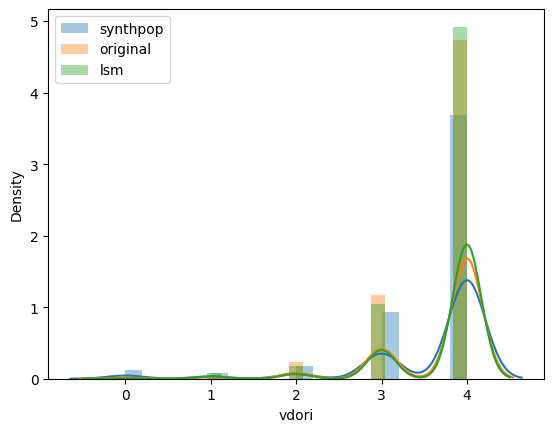

In [46]:
sns.distplot(dsynthpop.sample(1000).vdori,label='synthpop')
sns.distplot(D.vdori,label='original')
sns.distplot(Ds.vdori,label='lsm')
plt.legend()

In [47]:
D.corr(numeric_only=True)

,rage,female,black,hisp,SCHLYRS,vdori,vdlfl1z,vdlfl2,vdlfl3,vdwdimmz,vdwddelz,vdexf7z,vdsevens,vdcount
rage,1.000000,0.014401,-0.078852,-0.100093,-0.124402,-0.194997,0.048628,-0.051671,-0.005566,-0.283164,-0.258052,-0.290283,-0.097208,-0.120560
female,0.014401,1.000000,0.009793,0.028520,-0.013404,0.095400,-0.112952,-0.042603,-0.092001,0.079743,0.083358,-0.070426,-0.115411,0.043477
black,-0.078852,0.009793,1.000000,-0.229190,-0.051223,0.001037,-0.095369,-0.196367,-0.073842,-0.072551,-0.166459,-0.167627,-0.186396,-0.073538
hisp,-0.100093,0.028520,-0.229190,1.000000,-0.324666,-0.109427,-0.091293,-0.136604,-0.305504,-0.141099,-0.045493,-0.236755,-0.185362,-0.101370
SCHLYRS,-0.124402,-0.013404,-0.051223,-0.324666,1.000000,0.203799,0.086938,0.241474,0.394459,0.389206,0.328333,0.488465,0.414142,0.219535
vdori,-0.194997,0.095400,0.001037,-0.109427,0.203799,1.000000,0.237518,0.218476,0.274347,0.271341,0.250913,0.260215,0.279777,0.224402
vdlfl1z,0.048628,-0.112952,-0.095369,-0.091293,0.086938,0.237518,1.000000,0.303648,0.248724,0.052340,0.040411,0.159754,0.110975,0.059674
vdlfl2,-0.051671,-0.042603,-0.196367,-0.136604,0.241474,0.218476,0.303648,1.000000,0.233989,0.267570,0.268077,0.309137,0.268951,0.127580
vdlfl3,-0.005566,-0.092001,-0.073842,-0.305504,0.394459,0.274347,0.248724,0.233989,1.000000,0.255211,0.291318,0.412525,0.364865,0.223044
vdwdimmz,-0.283164,0.079743,-0.072551,-0.141099,0.389206,0.271341,0.052340,0.267570,0.255211,1.000000,0.739755,0.406768,0.310220,0.216068


In [49]:
gensamples_big=[qsample(s,model,steps=steps,alpha=.97,baseline_prob=getbp(s)) for s in tqdm(X[:10000])]
lsm_synthetic_df=pd.DataFrame(gensamples_big,columns=feature_names)
lsm_synthetic_df.to_csv('LSM_synthetic.csv')

100%|█████████████████████████████████████| 10000/10000 [06:21<00:00, 26.22it/s]
